# Proyecto de laboratorio i7 - Configuraciones de Transformadores
Integrantes:
- Nicolas Mantilla Molina - 2210707
- Santiago Montes Camacho - 2210718

In [56]:
#Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Fase 1: Relación de transformación
Se realizará la conexión de un trasformador sin carga, con el fin de comprender su funcionamiento y la relación de transformación de voltaje en el devanado primario con respecto al devanado secundario.

### Parte a: $N_s > N_p$

La pendiente de la recta es:  1.988
La ordenada al origen es:  0.06
El error porcentual de la pendiente es:  0.6 %
El MSE es:  0.014


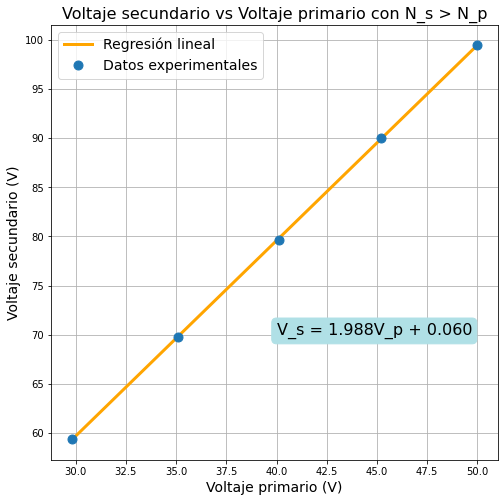

In [57]:
# Definimos las constantes
N_p = 250 # Numero de vueltas primario
N_s = 500 # Numero de vueltas secundario
rel_trans1 = N_s/N_p # Relacion de transformacion

#Importamos los datos de esta parte
fase1_1 = pd.read_csv("../data/fase1a.csv")

# #Calculamos la relacion de transformacion experimental
# fase1_1["trans"] = round(fase1_1["V_s"]/fase1_1["V_p"],3)

# #Calculamos el promedio y su desviación, asi como el error porcentual
# trans_exp1 = round(fase1_1["trans"].mean(),3)
# print("La relación de transformación experimental es: ", trans_exp1)
# print("La desviación estándar es: ", round(fase1_1["trans"].std(ddof=1),3))
# print("El error porcentual es: ", round(1-(trans_exp1/rel_trans1),3)*100,"%")

#Realizamos una regresión lineal para obtener la pendiente y la ordenada al origen
reg = np.polyfit(fase1_1["V_p"],fase1_1["V_s"],1)
print("La pendiente de la recta es: ", round(reg[0],3))
print("La ordenada al origen es: ", round(reg[1],3))
print("El error porcentual de la pendiente es: ", round(1-(reg[0]/rel_trans1),3)*100,"%")
print("El MSE es: ", round(np.mean((fase1_1["V_s"]-fase1_1["V_p"]*reg[0])**2),3))

# Graficamos V_s vs V_p
plt.figure(figsize=(8,8))
# plt.plot(fase1_1["V_p"],fase1_1["V_p"]*rel_trans1, "o-",label="Relación de transformación teórica")
plt.plot(fase1_1["V_p"],fase1_1["V_p"]*reg[0]+reg[1], "-",label="Regresión lineal", color="orange", linewidth=3)
plt.plot(fase1_1["V_p"],fase1_1["V_s"],'o',label="Datos experimentales", markersize=9)
plt.xlabel("Voltaje primario (V)", fontsize=14)
plt.ylabel("Voltaje secundario (V)", fontsize=14)
plt.title("Voltaje secundario vs Voltaje primario con N_s > N_p", fontsize=16)
plt.text(40, 70, f"V_s = {reg[0]:.3f}V_p + {reg[1]:.3f}", fontsize=16, bbox={"boxstyle" : "round", "color":"powderblue"})
plt.legend(fontsize=14)
# plt.axis("equal")
plt.grid()
plt.show()



### Parte b: $N_p > N_s$

La pendiente de la recta es:  0.5
La ordenada al origen es:  -0.018
El error porcentual de la pendiente es:  0.0 %
El MSE es:  0.002


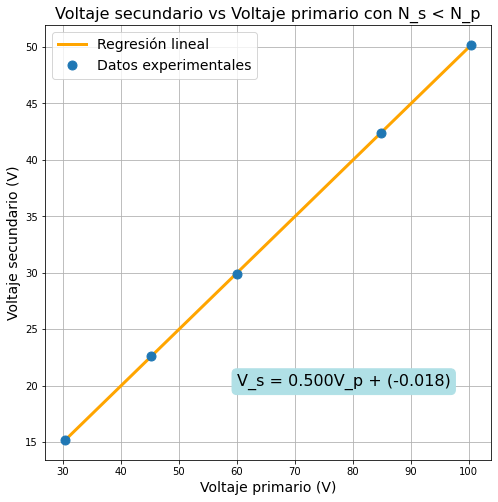

In [58]:
# Definimos las constantes
N_s = 250 # Numero de vueltas primario
N_p = 500 # Numero de vueltas secundario
rel_trans2 = N_s/N_p # Relacion de transformacion

#Importamos los datos de esta parte
fase1_2 = pd.read_csv("../data/fase1b.csv")

# #Calculamos la relacion de transformacion experimental
# fase1_2["trans"] = round(fase1_2["V_s"]/fase1_2["V_p"],3)

# #Calculamos el promedio y su desviación, asi como el error porcentual
# trans_exp2 = round(fase1_2["trans"].mean(),3)
# print("La relación de transformación experimental es: ", trans_exp2)
# print("La desviación estándar es: ", round(fase1_2["trans"].std(ddof=1),3))
# print("El error porcentual es: ", round(1-(trans_exp2/rel_trans2),3)*100,"%")

#Realizamos una regresión lineal para obtener la pendiente y la ordenada al origen
reg2 = np.polyfit(fase1_2["V_p"],fase1_2["V_s"],1)
print("La pendiente de la recta es: ", round(reg2[0],3))
print("La ordenada al origen es: ", round(reg2[1],3))
print("El error porcentual de la pendiente es: ", round(1-(reg2[0]/rel_trans2),3)*100,"%")
print("El MSE es: ", round(np.mean((fase1_2["V_s"]-fase1_2["V_p"]*reg2[0])**2),3))

# Graficamos V_s vs V_p
plt.figure(figsize=(8,8))
# plt.plot(fase1_2["V_p"],fase1_2["V_p"]*rel_trans2, "o-",label="Relación de transformación teórica")
plt.plot(fase1_2["V_p"],fase1_2["V_p"]*reg2[0]+reg2[1], "-",label="Regresión lineal", color="orange", linewidth=3)
plt.plot(fase1_2["V_p"],fase1_2["V_s"],'o',label="Datos experimentales", markersize=9)
plt.xlabel("Voltaje primario (V)", fontsize=14)
plt.ylabel("Voltaje secundario (V)", fontsize=14)
plt.title("Voltaje secundario vs Voltaje primario con N_s < N_p", fontsize=16)
plt.text(60, 20, f"V_s = {reg2[0]:.3f}V_p + ({reg2[1]:.3f})", fontsize=16, bbox={"boxstyle" : "round", "color":"powderblue"})
plt.legend(fontsize=14)
# plt.axis("equal")
plt.grid()
plt.show()

## Fase 2: Potencia disipada
Se determinará experimentalmente la potencia disipada del transformador en 5 casos:
- 3 Lámparas en serie
- 2 Lámparas en serie
- 1 Lámpara
- 2 Lámparas en paralelo
- 3 Lámparas de paralelo

In [64]:
# Definimos las constantes
N_s = 500
N_p = 250
rel_trans3 = N_s/N_p
desfase_amp = -0.22 #Desfase del amperimetro

# Importamos los datos de esta parte
fase2 = pd.read_csv("../data/fase2.csv")

# Corregimos el desfase del amperimetro
# fase2["I_p"] = fase2["I_p"]-desfase_amp
fase2["I_s"] = fase2["I_s"]-desfase_amp

# Calculamos la relacion de transformacion experimental
fase2["trans_V"] = round(fase2["V_s"]/fase2["V_p"],3)
fase2["trans_I"] = round(fase2["I_s"]/fase2["I_p"],3)

# Calculamos las potencias iniciales, finales y la diferencia para los 5 casos
fase2["P_p"] = round(fase2["V_p"]*fase2["I_p"],2)
fase2["P_s"] = round(fase2["V_s"]*fase2["I_s"],2)
fase2["P_dif"] = fase2["P_p"]-fase2["P_s"]

# Calculamos el promedio y su desviación, asi como el error porcentual
trans_exp3 = round(fase2["trans_V"].mean(),3)
print("La relación de transformación experimental es: ", trans_exp3)
print("La desviación estándar es: ", round(fase2["trans_V"].std(ddof=1),3))
print("El error porcentual es: ", round((1-trans_exp3/rel_trans3)*100,3),"%")

# Calculamos la potencia disipada
fase2["P_d"] = round(fase2["P_dif"]/fase2["P_p"]*100,2)
fase2["n"] = round(fase2["P_p"]/fase2["P_s"],3)

fase2

# Graficamos V_s vs V_p
# plt.figure(figsize=(10,6))
# plt.plot(fase2["V_p"],fase2["V_p"]*rel_trans3, "o-",label="Relación de transformación teórica")
# plt.plot(fase2["V_p"],fase2["V_s"],'o',label="Datos experimentales")
# plt.xlabel("Voltaje primario (V)", fontsize=14)
# plt.ylabel("Voltaje secundario (V)", fontsize=14)
# plt.title("Voltaje secundario vs Voltaje primario", fontsize=16)
# plt.legend(fontsize=14)
# plt.grid()
# plt.show()

La relación de transformación experimental es:  1.868
La desviación estándar es:  0.132
El error porcentual es:  6.6 %


,V_p,I_p,V_s,I_s,trans_V,trans_I,P_p,P_s,P_dif,P_d,n
0,50.5,0.53,99.0,0.21,1.960,0.396,26.76,20.79,5.97,22.31,1.287
1,50.6,0.58,99.0,0.22,1.957,0.379,29.35,21.78,7.57,25.79,1.348
2,50.5,0.80,97.6,0.33,1.933,0.412,40.40,32.21,8.19,20.27,1.254
3,50.0,1.37,92.2,0.62,1.844,0.453,68.50,57.16,11.34,16.55,1.198
4,50.1,2.11,82.5,0.98,1.647,0.464,105.71,80.85,24.86,23.52,1.307


In [67]:
#Ordenamos los datos según P_d
fase2 = fase2.sort_values(by="P_d", ascending=False)
fase2

# 2 en serie, 3 en paralelo, 3 en serie, 1, 2 en paralelo

,V_p,I_p,V_s,I_s,trans_V,trans_I,P_p,P_s,P_dif,P_d,n
1,50.6,0.58,99.0,0.22,1.957,0.379,29.35,21.78,7.57,25.79,1.348
4,50.1,2.11,82.5,0.98,1.647,0.464,105.71,80.85,24.86,23.52,1.307
0,50.5,0.53,99.0,0.21,1.960,0.396,26.76,20.79,5.97,22.31,1.287
2,50.5,0.80,97.6,0.33,1.933,0.412,40.40,32.21,8.19,20.27,1.254
3,50.0,1.37,92.2,0.62,1.844,0.453,68.50,57.16,11.34,16.55,1.198
